### Reading data and template

To get started, read in the data and template files, which can both be downloaded using the links in the yellow box above. Both the data and the template have a sampling rate of 4096 Hz. 

The data is 16 seconds of simulated, colored noise with a signal added somewhere in the first 12 seconds. The template is a 1 second inspiral-like signal. The template has been tapered at the beginning and end, so that it can be more easliy Fourier transformed.


In [7]:
# Get python libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import h5py
%matplotlib inline

In [3]:
# Read the data file
fs         = 4096 # Sampling at 4096 Hz
dfile      = h5py.File('data_w_signal.hdf5', 'r')
data      = dfile['strain/Strain'][...]
dfile.close()
time       = np.arange(0, 16, 1./fs)

In [5]:
# Now, we read the template file
tempfile = h5py.File('template.hdf5', 'r')
template = tempfile['strain/Strain'][...]
temp_time = np.arange(0, template.size / (1.0*fs), 1./fs)
tempfile.close()

The signal is apparently somewhere in the first 12 seconds of the data file. We need to figure out where it is?

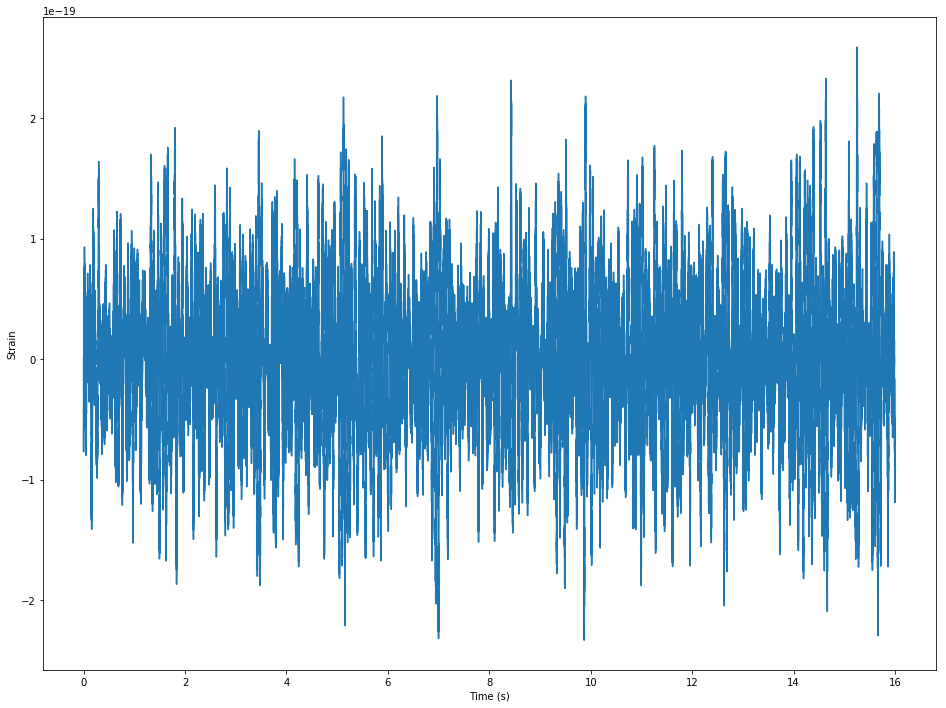

In [12]:
plt.figure(figsize=(16, 12))
plt.plot(time, data)
plt.xlabel('Time (s)')
plt.ylabel('Strain')

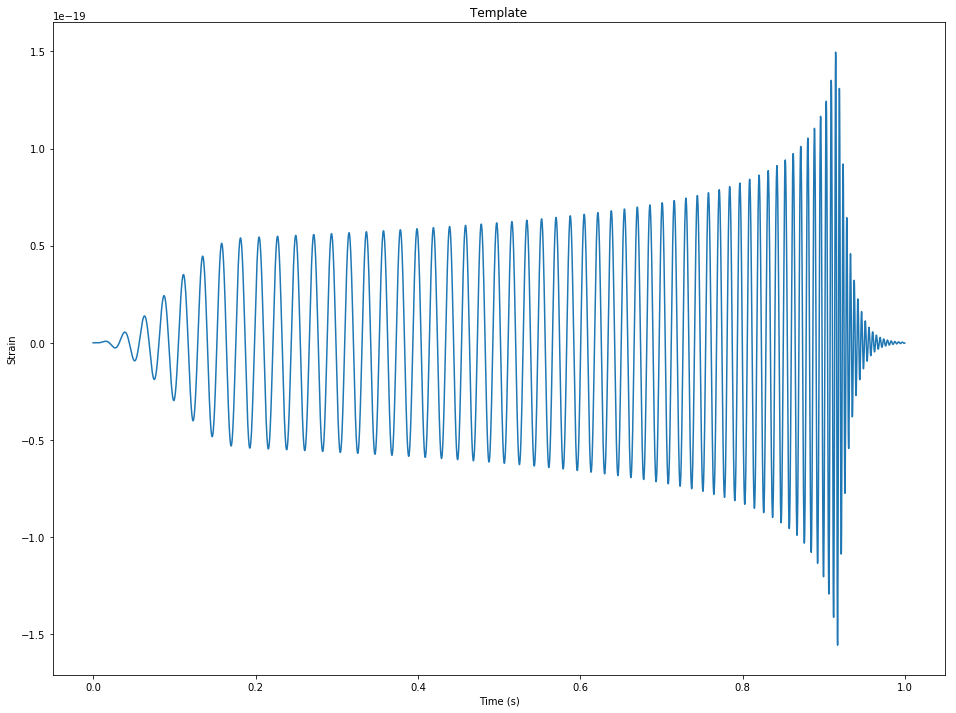

In [11]:
plt.figure(figsize=(16,12))
plt.plot(temp_time, template)
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title('Template')

## Three ways to finding Signal

#### 1) Bandpass Filter

The signal amplitude is much smaller than the noise amplitude. However, it is possible to recover this signal because it has more power than the noise at some frequencies. To see which frequencies, try to plot an ASD of the template and the noise. 

You can assume the signal is only in the first 12 seconds of data, so you can use the last 4 seconds to make an ASD of just noise. The noise is simulated, colored Gaussian noise, high pass filtered with a 20 Hz cut-off. The tapering in the template effectively acts as a high-pass filter above 50 Hz. Between 50 and 200 Hz, the ASD of the template can be seen to fall with an $f^{(-7/6)}$ power law, which is characteristic of inspirals. The "ringdown" can be seen as a small bump around 210 Hz.

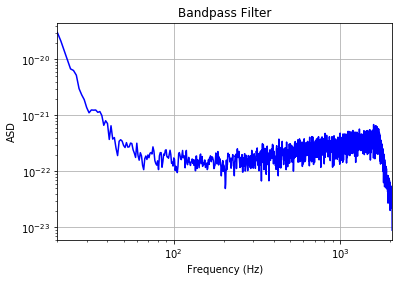

In [15]:
# Plot the ASD of data
plt.figure(figsize=(16,12))
power_data, freq_psd = plt.psd(data[12*fs:], Fs=fs, NFFT=fs, visible=False)
plt.close()
plt.figure()
plt.loglog(freq_psd, np.sqrt(power_data), 'b')
plt.xlim([20, 2048])
plt.xlabel('Frequency (Hz)')
plt.ylabel('ASD')
plt.grid('on')
plt.title('Bandpass Filter')

#### 2) Time domain cross-correlation





#### 3) Optical matched filter